## Matplotlib常用技巧

#### 首先导入对应的包

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 设置绘图样式

In [2]:
plt.style.use('classic')

#### 在NoteBook中显示静态图形

In [3]:
%matplotlib inline

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


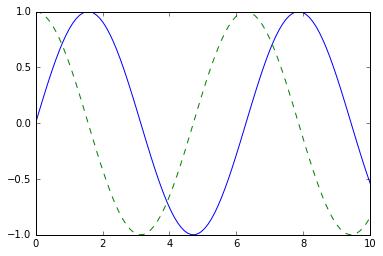

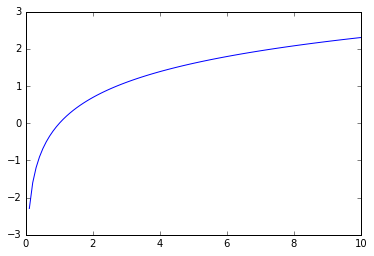

In [4]:
import numpy as np
x=np.linspace(0,10,100) #产生x1,x2之间的N点行线性的矢量。其中x1、x2、N分别为起始值、终止值、元素个数。若默认N，默认点数为100。
fig=plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')
y=np.linspace(0,10,100)

fig1=plt.figure()
plt.plot(x,np.log(x),'-')

#### 将图形保存为文件

In [5]:
fig.savefig('my_figure.jpg')

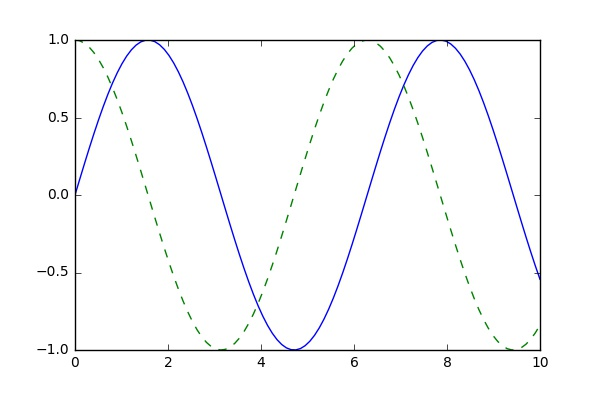

In [6]:
from IPython.display import Image
Image('my_figure.jpg')

## 两种画图接口

#### Matlab风格

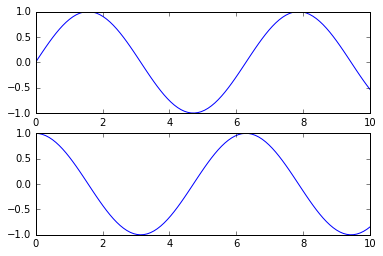

In [7]:
plt.figure() #创建图形

plt.subplot(2,1,1) #行 列 子图编号
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.cos(x))

#### 面向对象接口

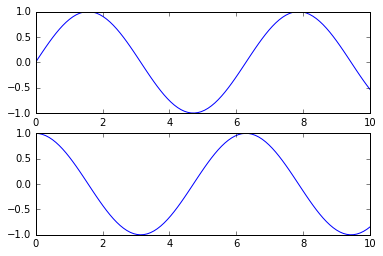

In [8]:
fig,ax=plt.subplots(2)

ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

## 简易折线图

In [9]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

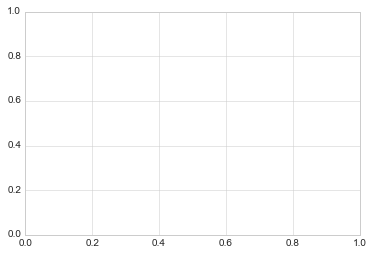

In [10]:
fig=plt.figure()  #fig为一个图形实例
ax=plt.axes()  #ax是一组坐标轴实例

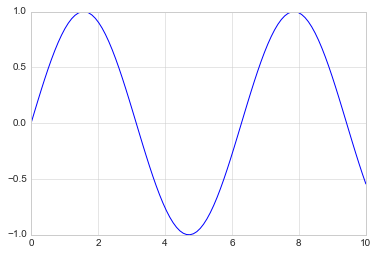

In [11]:
ax.plot(x,np.sin(x))
fig

#### 调整颜色

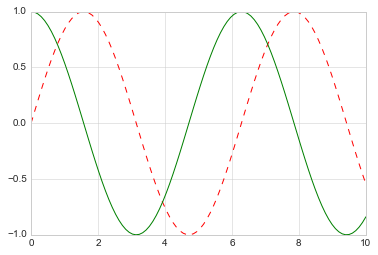

In [12]:
plt.plot(x,np.sin(x),color='r',linestyle='--')
plt.plot(x,np.cos(x),'-g')

### 调整图形上下限
* xlim 和 ylim
* 上下限的值也可以从大到下，逆序排列

(0.0, 10.0, -0.9999471661761239, 1.0)

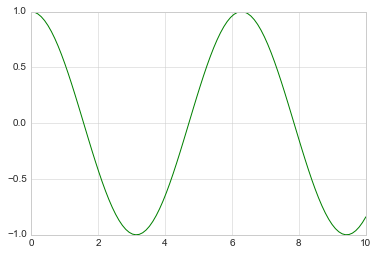

In [13]:

plt.xlim(-1,11)
plt.ylim(-1.5,1.5)

plt.plot(x,np.cos(x),'-g')
plt.axis('tight')  #紧缩坐标轴，使图形不留空白区域

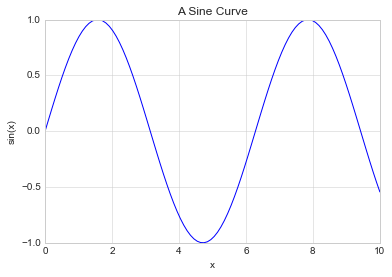

In [14]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

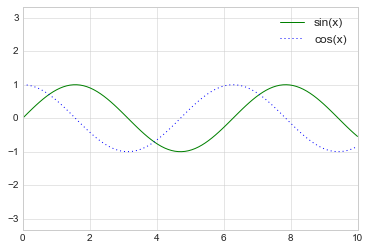

In [15]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

## 简易散点图（温故知新）

> 简易散点图（scatter plot）

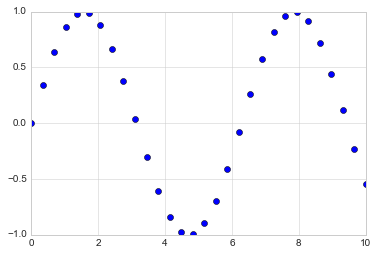

In [16]:
x=np.linspace(0,10,30)
y=np.sin(x)

plt.plot(x,y,'o',color='blue')

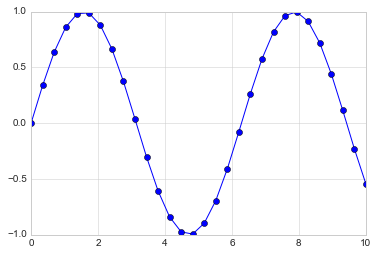

In [17]:
plt.plot(x,y,'-o')

(-1.2, 1.2)

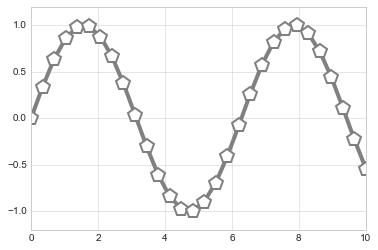

In [18]:
plt.plot(x, y, '-p', color='gray',markersize=15, linewidth=4,markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
plt.ylim(-1.2, 1.2)

### 用scatter画散点图

> **plt.scatter** 与 **plt.plot** 的主要差别在于，前者在创建散点图时具有更高的灵活性，可以
单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性（大小、表面颜色、边
框颜色等）

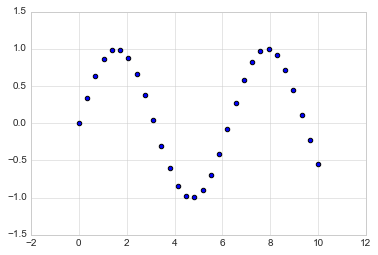

In [19]:
plt.scatter(x,y,marker='o')

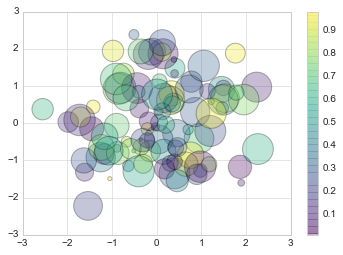

In [20]:
#创建一个随机散点图
rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.rand(100)
sizes=1000*rng.rand(100)

plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar()

In [21]:
rng.randn(1,2)

array([[0.5785215 , 0.34965446]])

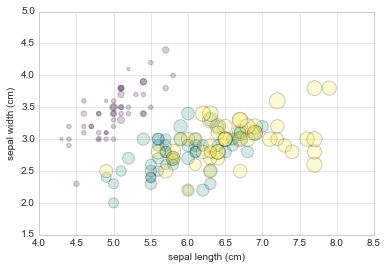

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## 可视化异常处理

In [24]:
# 在数据可视化的结果中用图形将误差有效地显示出来，就可以提供更充分的信息

### 基本误差线 （errorbar）

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<Container object of 3 artists>

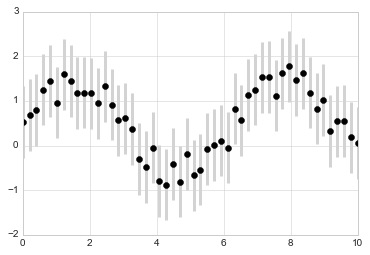

In [48]:
x=np.linspace(0,10,50)
dy=0.8
y=np.sin(x)+dy*np.random.rand(50)
plt.errorbar(x,y,yerr=dy,fmt='ok',ecolor='lightgray', elinewidth=3, capsize=0) #fmt 是一种控制线条和点的外观的代码格式

## 连续误差

> 我们将用 Scikit-Learn 程序库 API 里面一个简单的高斯过程回归方法（Gaussian process
regression， GPR）来演示。这是用一种非常灵活的非参数方程（nonparametric function）对
带有不确定性的连续测量值进行拟合的方法。

In [53]:
from sklearn.gaussian_process import GaussianProcess
# 定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# 计算高斯过程拟合结果
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma~95%置信区间

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

ImportError: cannot import name 'GaussianProcess'

## 密度图和等高线图

> 有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方法。 Matplotlib 提供
了三个函数来解决这个问题：用 plt.contour 画等高线图、用 **plt.contourf** 画带有填充色
的等高线图（filled contour plot）的色彩、用 **plt.imshow** 显示图形。

In [79]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)
    #return X+Y

In [80]:
# 等高线图可以用 plt.contour 函数来创建。它需要三个参数： x 轴、 y 轴、 z 轴三个坐标
# 轴的网格数据。 x 轴与 y 轴表示图形中的位置，而 z 轴将通过等高线的等级来表示。用
# np.meshgrid 函数来准备这些数据可能是最简单的方法，它可以从一维数组构建二维网格
# 数据：
x=np.linspace(0,5,50)
y=np.linspace(0,5,40)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)

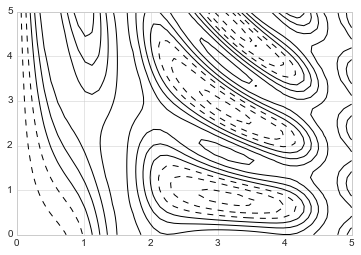

In [86]:
plt.contour(X,Y,Z,colors='black')

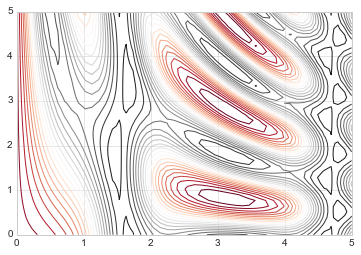

In [87]:
plt.contour(X,Y,Z,20,cmap='RdGy') #将数据范围等分为 20 份，然后用不同的颜色表示

### 用彩色等高线可视化三维数据

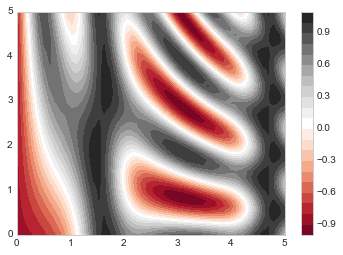

In [97]:
plt.contourf(X,Y,Z,20,cmap='RdGy') 
plt.colorbar()

### 带填充色的三维数据可视化图

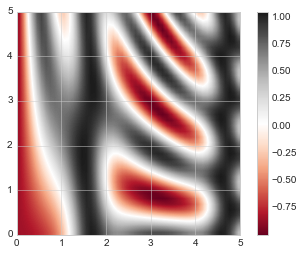

In [101]:
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
plt.colorbar()

#plt.axis(aspect='image')

### 使用 imshow() 函数时有一些注意事项。
* plt.imshow() 不支持用 x 轴和 y 轴数据设置网格，而是必须通过 extent 参数设置图形的坐标范围 [xmin, xmax, ymin, ymax]
* plt.imshow() 默认使用标准的图形数组定义，就是原点位于左上角（浏览器都是如此），而不是绝大多数等高线图中使用的左下角。这一点在显示网格数据图形的时候**必须调整**。
* plt.imshow() 会 自 动 调 整 坐 标 轴 的 精 度 以 适 应 数 据 显 示。 你 可 以 通 过 plt.axis(aspect='image') 来设置 x 轴与 y 轴的单位。

### 重新渲染三维数据的彩色图

> 用一幅背景色半透明的彩色图（可以通过 alpha 参数设置透
明度），与另一幅坐标轴相同、带数据标签的等高线图叠放在一起（用 plt.clabel() 函数
实现）

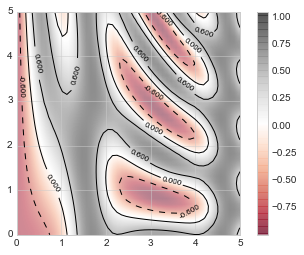

In [110]:
contours=plt.contour(X,Y,Z,3,colors='black')
plt.clabel(contours,inline=True,fontsize=8)  #对等高线进行标注

plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.5)
plt.colorbar()

## 频次直方图、 数据区间划分和分布密度

(array([ 13.,  52., 105., 203., 236., 223., 125.,  34.,   7.,   2.]),
 array([-2.86393567, -2.22916299, -1.59439032, -0.95961765, -0.32484498,
         0.3099277 ,  0.94470037,  1.57947304,  2.21424571,  2.84901839,
         3.48379106]),
 <a list of 10 Patch objects>)

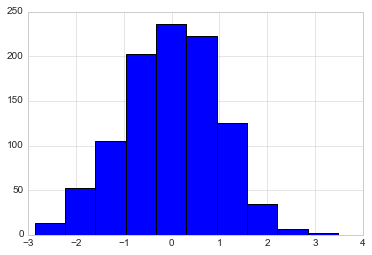

In [116]:
data=np.random.randn(1000)
plt.hist(data)

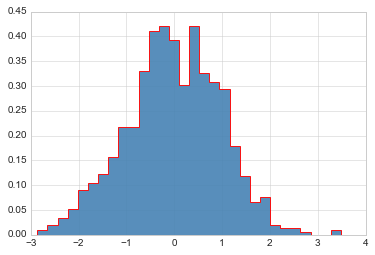

In [120]:
plt.hist(data, bins=30, normed=True, alpha=0.9,histtype='stepfilled', color='steelblue',edgecolor='red');

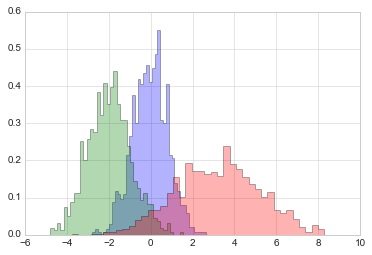

In [123]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40) #中间没有间隔线
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [126]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 65 308 459 159   9]


## 二维频次图

In [128]:
#先用一个多元高斯分布生成x和y的数据
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T

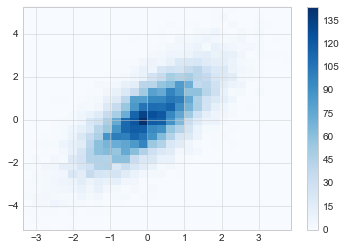

In [130]:
plt.hist2d(x,y,bins=30,cmap='Blues')

plt.colorbar()

#### 用 plt.hist2d 函数画二维频次直方图

In [137]:
counts,xedegs,yedegs=np.histogram2d(x,y,bins=30)
xedegs,yedegs

(array([-3.35934975, -3.11875692, -2.87816409, -2.63757125, -2.39697842,
        -2.15638559, -1.91579276, -1.67519992, -1.43460709, -1.19401426,
        -0.95342142, -0.71282859, -0.47223576, -0.23164293,  0.00894991,
         0.24954274,  0.49013557,  0.73072841,  0.97132124,  1.21191407,
         1.4525069 ,  1.69309974,  1.93369257,  2.1742854 ,  2.41487824,
         2.65547107,  2.8960639 ,  3.13665673,  3.37724957,  3.6178424 ,
         3.85843523]),
 array([-5.12139513, -4.77417881, -4.4269625 , -4.07974618, -3.73252987,
        -3.38531355, -3.03809723, -2.69088092, -2.3436646 , -1.99644829,
        -1.64923197, -1.30201565, -0.95479934, -0.60758302, -0.26036671,
         0.08684961,  0.43406593,  0.78128224,  1.12849856,  1.47571487,
         1.82293119,  2.17014751,  2.51736382,  2.86458014,  3.21179645,
         3.55901277,  3.90622909,  4.2534454 ,  4.60066172,  4.94787804,
         5.29509435]))

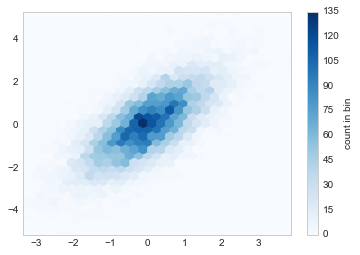

In [139]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 核密度估计
> 空间中离散的数据点，从而拟合出一个平滑的函数。在 scipy.stats 程序包里面有一
个简单快速的 KDE 实现方法

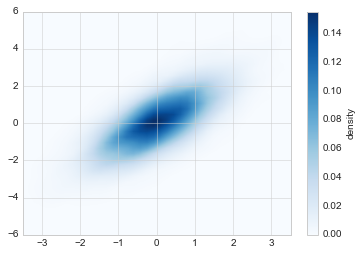

In [140]:
from scipy.stats import gaussian_kde
# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

## 配置图例

* 可以用 plt.legend() 命令来创建最简单的图例，它会自动创建一个包含每个图形元素的图
例

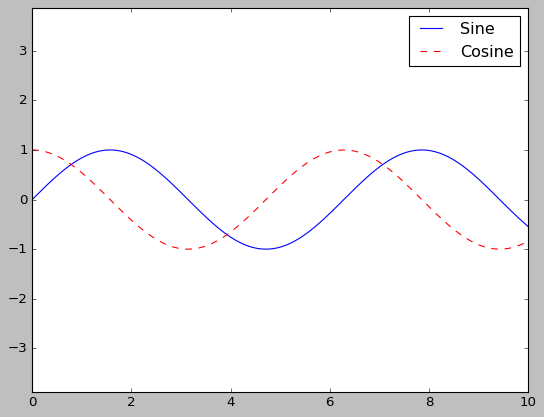

In [171]:
plt.style.use('classic')  #设置样式

x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
ax.axis('equal')
ax.legend()
#ax.legend(loc='upper left', frameon=False)

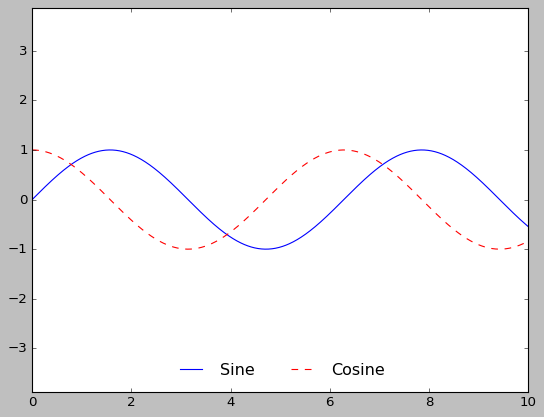

In [164]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

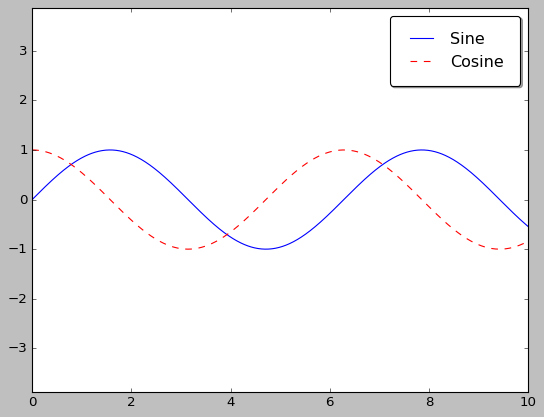

In [169]:
#还可以为图例定义圆角边框（fancybox）、增加阴影、改变外边框透明度（framealpha 值）
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

fig

### 如何选择所要显示的元素

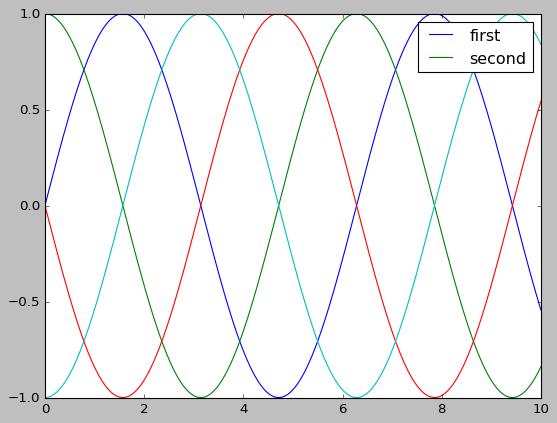

In [173]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second'])

### 在图例中显示不同尺寸的点

### 配置颜色条

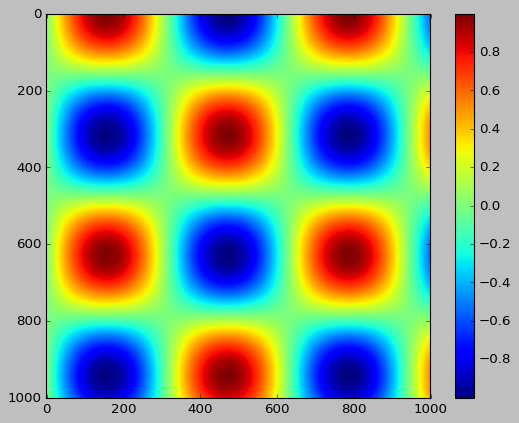

In [178]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

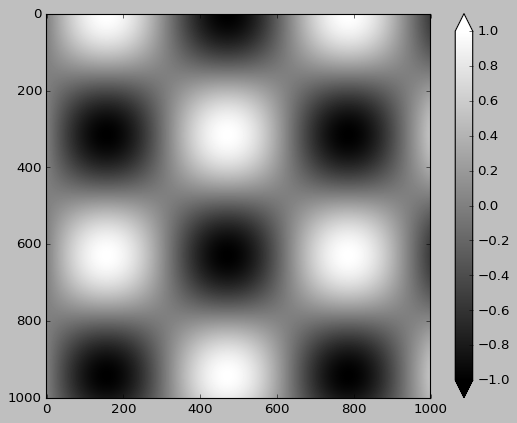

In [191]:
plt.imshow(I,cmap='gray')
plt.colorbar(extend='both')
plt.clim(-1, 1);

In [187]:
from matplotlib.colors import LinearSegmentedColormap
def grayscale_cmap(cmap):
    cmap=plt.cm.get_cmap(cmap)
    colors=cmap(np.arange(cmap.N))
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
def view_colormap(cmap):
    #"""用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

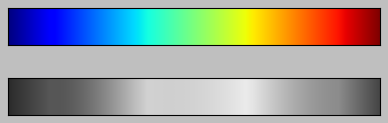

In [186]:
view_colormap('jet')

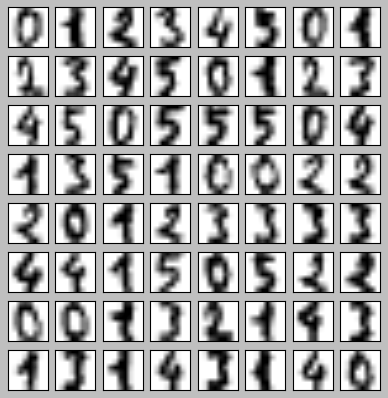

In [198]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

>由于每个数字都由 64 像素的色相（hue）构成，因此可以将每个数字看成是一个位于 64
维空间的点，即每个维度表示一个像素的亮度。但是想通过可视化来描述如此高维度的空
间是非常困难的。一种解决方案是通过降维技术，在尽量保留数据内部重要关联性的同时
降低数据的维度，例如流形学习（manifold learning）。

In [199]:
# 用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap
iso =Isomap(n_components=2)
projection=iso.fit_transform(digits.data)

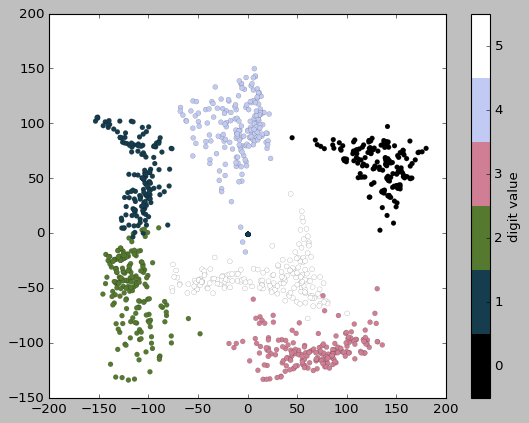

In [200]:
# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

## 多个子图

In [201]:
 %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### 第一种：手动创建

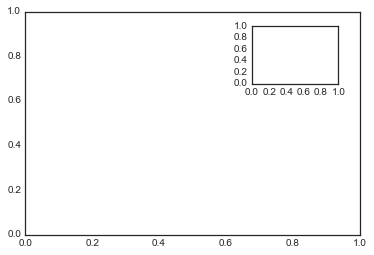

In [205]:
ax1=plt.axes()
ax2=plt.axes([0.65,0.65,0.2,0.2]) #这四个值分别表示图形坐标系统的 [bottom, left, width, height]（底坐标、左坐标、宽度、高度）
# 数值的取值范围是左下角（原点）为 0，右上角为 1。

#就是坐标轴原点位于图形高度 65% 和宽度 65% 的位置,将坐标轴的宽度与高度设置为图形的 20%

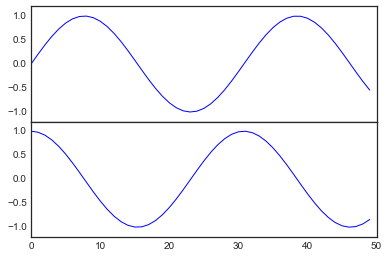

In [210]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### 简易网格子图

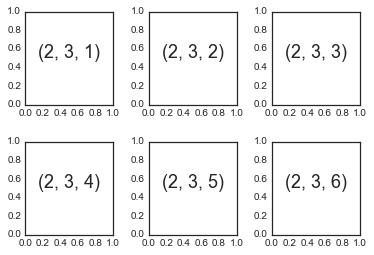

In [217]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  #调整子图间的间隔
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

### plt.subplots： 用一行代码创建网格

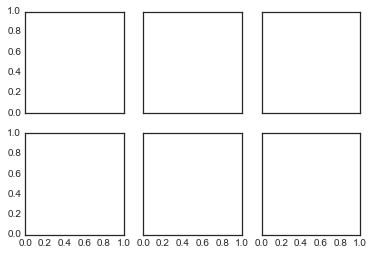

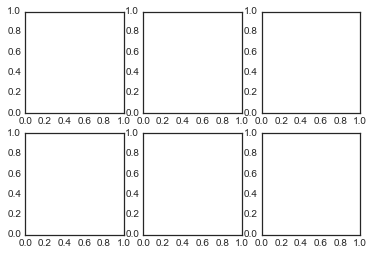

In [226]:
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')
fig,ax=plt.subplots(2,3)

## **plt.GridSpec**： 实现更复杂的排列方式

> 可以通过类似 Python 切片的语法设置子图的位置和扩展尺寸

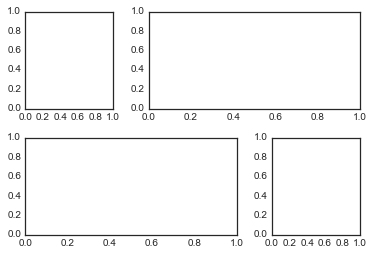

In [228]:

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

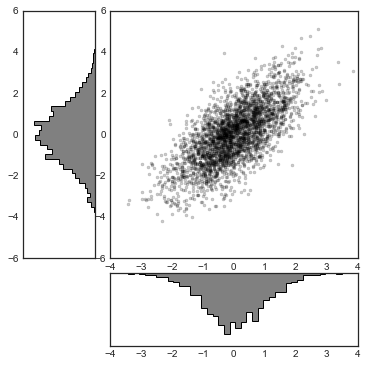

In [229]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled',
orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## 自定义坐标轴刻度
> 如何将坐标轴刻度调整为你需要的位置与格式

> 每个 axes 都有 xaxis 和 yaxis 属性，每个属性同样包含构成坐标轴的线条、刻度和标签的全部属性。

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

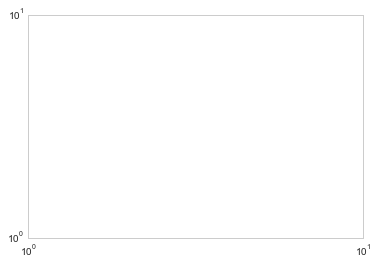

In [232]:
ax = plt.axes(xscale='log', yscale='log')

### 对数刻度与标签

In [233]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### 隐藏刻度与标签

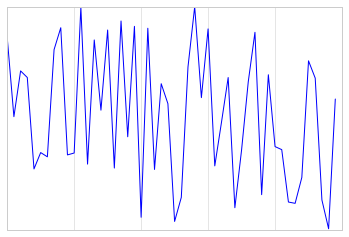

In [258]:
#最常用的刻度 / 标签格式化操作可能就是隐藏刻度与标签了
# Locator是刻度
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
#ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())

#### 注意: 我们移除了 x 轴的标签（但是保留了刻度线 / 网格线），以及 y 轴的刻度（标签也一并被移除）。
#### NullFormatter( )保留了刻度线，而NullLocator( )标签也一并被移除；

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\LeiLei\scikit_learn_data


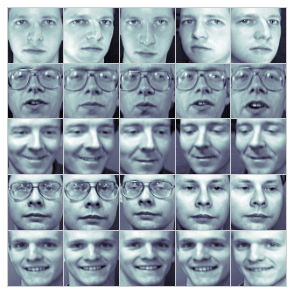

In [237]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# 从scikit-learn获取一些人脸照片数据
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

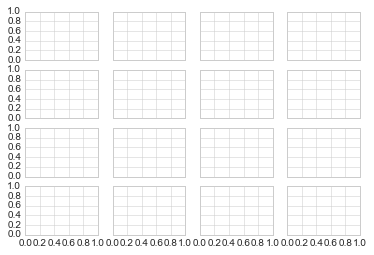

In [244]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

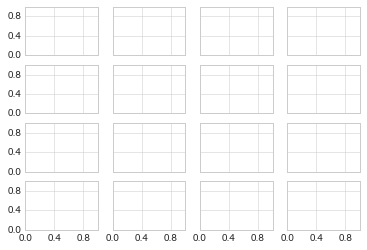

In [250]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3)) #plt.MaxNLocator()来解决这个问题，通过它可以设置最多需要显示多少刻度。根据设置的最多刻度数量，
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## Matplotlib自定义： 配置文件与样式表

### 手动配置图形

(array([  2.,  28.,  50., 119., 192., 228., 177., 131.,  52.,  21.]),
 array([-3.06108589, -2.49223113, -1.92337637, -1.35452161, -0.78566686,
        -0.2168121 ,  0.35204266,  0.92089742,  1.48975218,  2.05860693,
         2.62746169]),
 <a list of 10 Patch objects>)

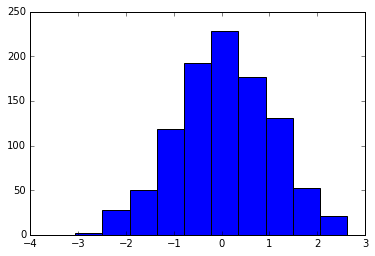

In [259]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline
x=np.random.randn(1000)
plt.hist(x)

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


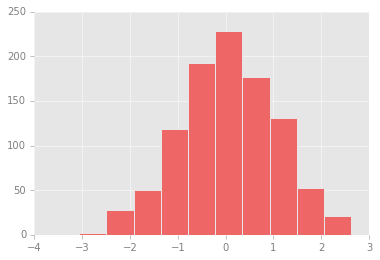

In [267]:
#通过手动调整，可以让它成为美图
ax=plt.axes(axisbg='#e6e6e6')
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)

# 隐藏上边与右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
# 弱化刻度与标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
# 设置频次直方图轮廓色与填充色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

#### 这样设置可太费劲儿了！

> 修改默认配置： rcParams

In [268]:
IPython_default = plt.rcParams.copy()

In [270]:
#用 plt.rc 函数来修改配置参数
from matplotlib import cycler
colors = cycler('color',
['#EE6666', '#3388BB', '#9988DD',
'#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

(array([  2.,  28.,  50., 119., 192., 228., 177., 131.,  52.,  21.]),
 array([-3.06108589, -2.49223113, -1.92337637, -1.35452161, -0.78566686,
        -0.2168121 ,  0.35204266,  0.92089742,  1.48975218,  2.05860693,
         2.62746169]),
 <a list of 10 Patch objects>)

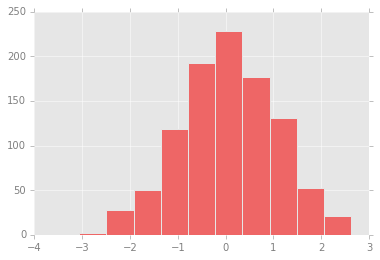

In [271]:
plt.hist(x)

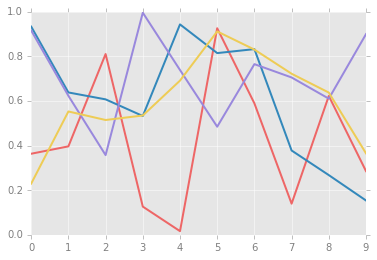

In [273]:
for i in range(4):
    plt.plot(np.random.rand(10))

## 样式表
>2014 年 8 月发布的 Matplotlib 1.4 版本中增加了一个非常好用的 style 模块，里面包含了大
量的新式默认样式表，还支持创建和打包你自己的风格。

In [274]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot']

In [278]:
plt.style.use('dark_background')  #应用某个样式

(array([  2.,  28.,  50., 119., 192., 228., 177., 131.,  52.,  21.]),
 array([-3.06108589, -2.49223113, -1.92337637, -1.35452161, -0.78566686,
        -0.2168121 ,  0.35204266,  0.92089742,  1.48975218,  2.05860693,
         2.62746169]),
 <a list of 10 Patch objects>)

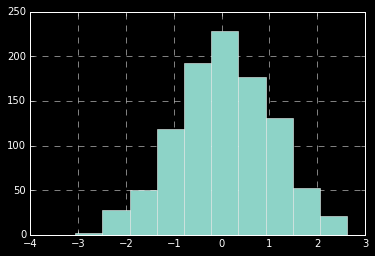

In [279]:
plt.hist(x)

In [281]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [297]:
plt.style.available[:]  #可用样式列表

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

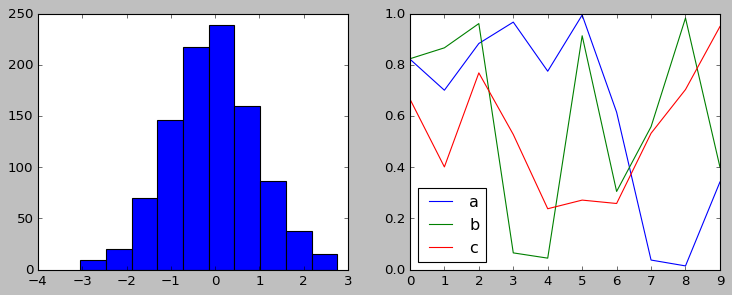

In [313]:
plt.style.use('classic')
hist_and_lines()

## 用Matplotlib画三维图

In [314]:

#可以导入 Matplotlib 自带的 mplot3d 工具箱来画三维图
from mpl_toolkits import mplot3d

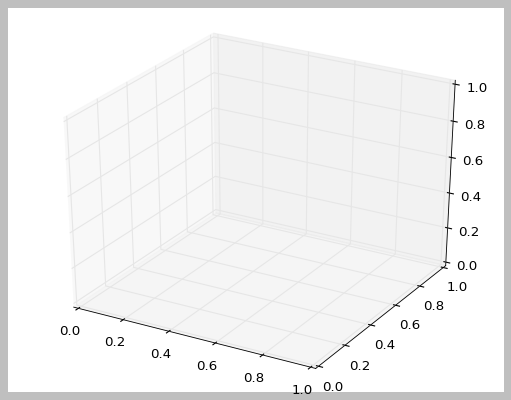

In [315]:
plt.style.use('classic')  #应用某个样式
fig=plt.figure()
ax=plt.axes(projection='3d')

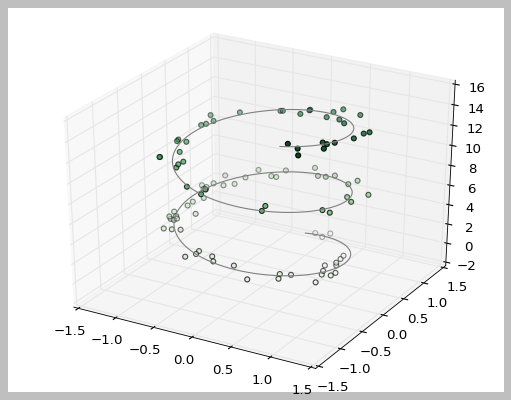

In [320]:
ax = plt.axes(projection='3d')

# 三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')


## 三维等高线图

#### ax.contour3D 要求所有数据都是二维网格数据的形式，并且由函数计算 z 轴数值

In [321]:
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

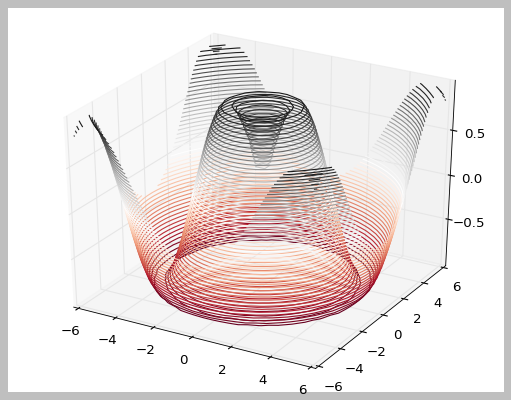

In [325]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='RdGy')

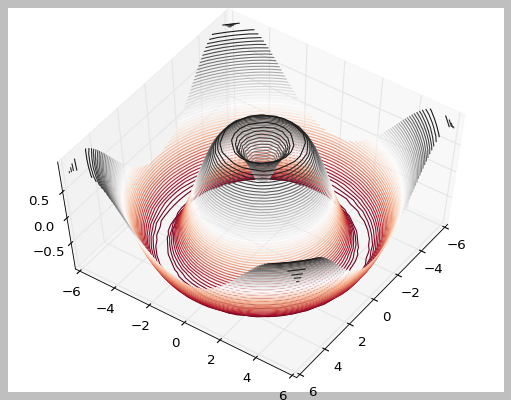

In [330]:
#把俯仰角调整为 60 度（这里的 60 度是 x-y 平面的旋转角度），方位角调整为 35 度（就是绕 z 轴顺时针旋转 35 度）：
ax.view_init(60, 35) 
fig

## 线框图和曲面图

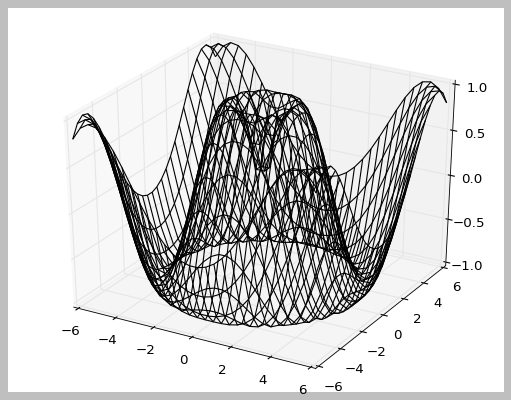

In [331]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,colors='black')

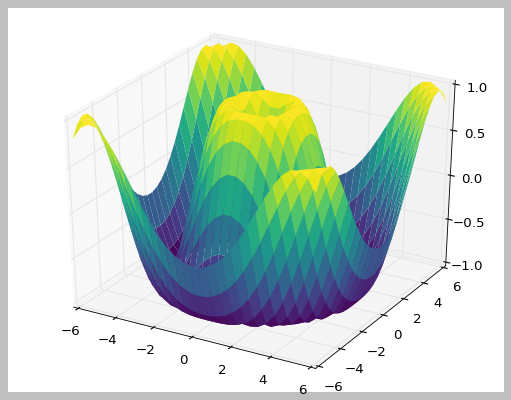

In [332]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')

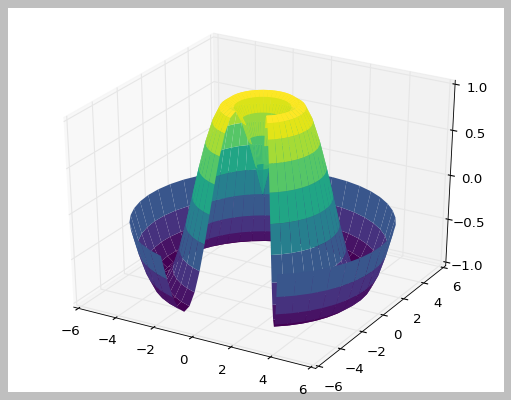

In [334]:
#画曲面图需要二维数据，但可以不是直角坐标系（也可以用极坐标）。下
#面的示例创建了一个局部的极坐标网格（polar grid），当我们把它画成 surface3D 图形时，
#可以获得一种使用了切片的可视化效果
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none');

## 案例： 莫比乌斯带

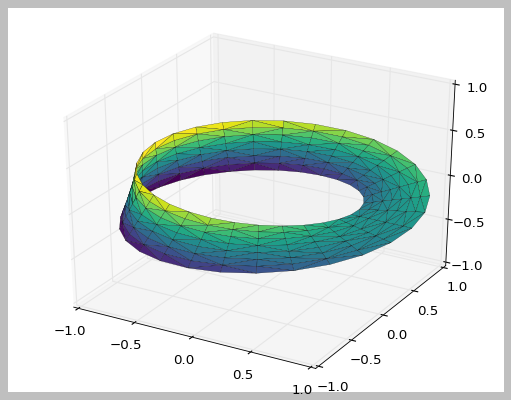

In [336]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta
 # x - y平面内的半径
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

## 用Basemap可视化地理数据